### Solving Duffing equation using time integration

The duffing equation is given by:

$$
\ddot{x} + \delta\dot{x} + \alpha x + \beta x^3 = \gamma cos(\omega t)
$$

where $\delta$, $\alpha$, $\beta$, $\gamma$ and $\omega$ are constants such that:
- $\delta$ controls the amount of damping,

- $\alpha $ controls the linear stiffness,

- $\beta $ controls the amount of non-linearity in the restoring force; if $\beta =0,$ the Duffing equation describes a damped and driven simple harmonic oscillator,

- $\gamma $ is the amplitude of the periodic driving force; if ${\gamma =0}$ the system is without a driving force, and

- $\omega $ is the angular frequency of the periodic driving force.


### Import libraries


In [8]:
using DifferentialEquations
using Plots

The second-order ODE can be converted into a system of two first order ODEs. 

$$y_1 = x$$
$$y_2 = \dot{x}$$

The duffing equation is then modified to: 
$$ \dot{y_1} = y_2$$
$$\dot{y_2} = -\delta y_2 - \alpha y_1 - \beta y_1^3 + \gamma cos(\omega t)$$

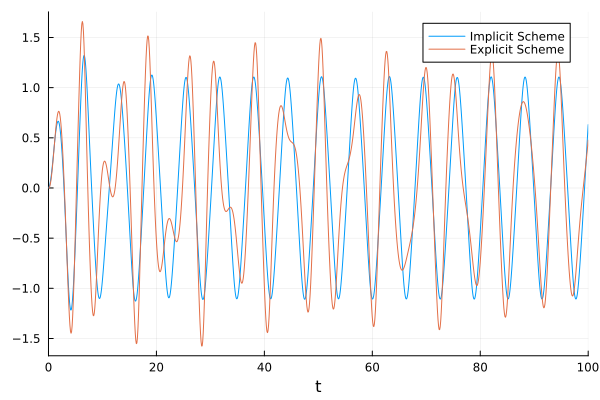

In [59]:
#Define the Duffing equations


function duffing(du, u, p, t)
    alpha, delta, beta, gamma, omega = p
    du[1] = u[2]
    du[2] = -delta * u[2] - alpha * u[1] - beta * u[1]^3 + gamma * cos(omega * t)
end

# Setting parameters
alpha = 1.0 # linear stiffness
beta = 1.0 # nonlinear stiffness
delta = 0.3 # damping coefficient
gamma = 1 # forcing amplitude
omega = 1.0 # forcing frequency

p = [alpha, delta, beta, gamma, omega]

# Define initial conditions
u0 = [0.0, 0.0]

# Define time span
tspan = (0.0, 100.0)
dt = 0.1
# Solve the ODE
prob = ODEProblem(duffing, u0, tspan, p)
sol1 = solve(prob, ImplicitEuler(), dt=dt) # setting solver to ImplicitEuler
sol2 = solve(prob, Euler(), dt=dt) # setting solver to Euler

# Plot for both solvers and compare
plot(sol1, vars=(0, 1), label="Implicit Scheme")
plot!(sol2, vars=(0, 1), label="Explicit Scheme")


### Fast fourier transform

Also performing an FFT on the obtained solution to verify the amplitude and the harmonic from the harmonic balance method.

Dominant frequency: 0.15555555555555556
Amplitude of the dominant frequency: 0.8679157942456512


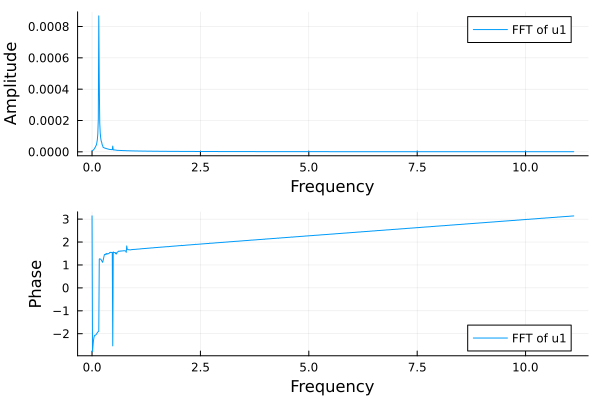

In [92]:
# import libary for fft
using FFTW
using Statistics

# performing fft on the solution u1 to see the frequency components

Nsamples = 2000
Tstart = 10
Tend = 100
dt = (Tend - Tstart) / (Nsamples)
tsampled = Vector(Tstart:dt:Tend)
usampled = [sol1(t)[1] for t in tsampled]

# performing fft
fsampled = fft(usampled)
fsampled = 2*fsampled / Nsamples


# frequency
f_max = 1 / (2 * dt)
fstep = 1/((Tend - Tstart))
fvec = Vector(0:fstep:f_max)

# determining the dominant frequency
fmax = fvec[argmax(abs.(fsampled[1:length(fvec)]))]
println("Dominant frequency: ", fmax)

# find amplitude of the dominant frequency
amp = abs(fsampled[argmax(abs.(fsampled[1:length(fvec)]))])
println("Amplitude of the dominant frequency: ", amp)

# plotting the frequency components
p1 = plot(fvec, 2.0/Nsamples * abs.(fsampled[1:length(fvec)]), label="FFT of u1", xlabel="Frequency", ylabel="Amplitude")
p2 = plot(fvec, angle.(fsampled[1:length(fvec)]), label="FFT of u1", xlabel="Frequency", ylabel="Phase")
plot(p1, p2, layout=(2,1))

